### Other presentation notes
1. Andrea
  * used lots of bar graphs - I should do more of this, rather than numbers
  * Avoid charts and big decimal numbers. Use Graphs and rounded numbers, percentages are always better.

2. Emily
  * Very nice visualizations
  * I get exactly what I want and can see out of each slide.
  * Recommendations slide very nice and good recommendations!
  * Make those headlines catchy

3. Vijay
  * I didn't understand words in this presentation
  * Very technical - don't do this.

4. Prince
  * The blocks for flow don't really make sense.
  * Visuals are nice
  * Be louder
  * Very thorough. Analyzes many variables vs. Churn
    * maybe don't present all of this, but definitely useful to do. 
  * EDA Summary has Waaaaay too much text.
  * Recommendations good, lots of text. 

# 0.1 Project Plan

1. Project Plan (0.25 hrs)
2. Data Discovery (4 hrs)
3. Business Review - Documentation (1 hr)
4. QC at regular intervals (5 hrs)
5. Create Dummy Variables (2 hrs)
6. Build Models (8 hrs)
  * Logistic Regression (2 hrs)
  * KNN (2 hrs)
  * Try and Learn Decision Trees (4 hrs)
7. Make code reusable and productionized (4 hrs)
8. Create Presentation (3 hrs)

Total Projected Time: $0.25+4+1+5+2+8+4+3 = 27.25 $ hrs

# 0.2 Initialize/Import/Mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report,mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [0]:
churn_url = '/content/drive/My Drive/1000ml/Project 3 - Churn Prediction/hr_data.txt'
churn_df = pd.read_table(churn_url, delimiter=',')
# Rename column titled 'sales' to 'department' since this makes more sense
churn_df.rename(columns={'sales':'department','average_montly_hours':'avg_monthly_hrs','time_spend_company':'yrs_w_company'},inplace=True)

# 1. Data Discovery

## 1.1 Shape of DF

In [0]:
churn_df.shape

(14999, 11)

## 1.2 Head and Tail

Nothing weird seems to be going on at a glance. Some things to note:

* Churn will be the target values.
* id colum is useless since it matches the index. 
* Satisfaction level is the employee happiness with job
* last_evaluation: 0->fired, 100->rockstar
* time_spend_company = years
* number_project is projects completed


In [0]:
churn_df

,id,satisfaction_level,last_evaluation,number_project,avg_monthly_hrs,yrs_w_company,Work_accident,churn,promotion_last_5years,department,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,low
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...,...
14994,14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,14997,0.11,0.96,6,280,4,0,1,0,support,low


## 1.3 Datatypes

We have to consider which of the numeric variables are categorical. We can do that in the next section.

In [0]:
churn_df.dtypes

id                         int64
satisfaction_level       float64
last_evaluation          float64
number_project             int64
avg_monthly_hrs            int64
yrs_w_company              int64
Work_accident              int64
churn                      int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

## 1.4 Unique Values

A few things to note here:

* ID is obviously unique
* satisfaction_level, last_evaluation and avg_monthly_hrs are numeric and can be considered continuous
* yrs_w_company and number_project are numeric, but not in the same way as above
* department would be categorical, but not hierarchical
* salary is categorical, and hierarchical
* promotion_last_5years and Work_accident are categorical and boolean
* Churn is categorical and boolean, and also the target value

In [0]:
churn_df.nunique()

id                       14999
satisfaction_level          92
last_evaluation             65
number_project               6
avg_monthly_hrs            215
yrs_w_company                8
Work_accident                2
churn                        2
promotion_last_5years        2
department                  10
salary                       3
dtype: int64

## 1.5 Separating columns into Numeric, Categorical and Other

In [0]:
# The numeric and cts columns
numeric_cols = ['satisfaction_level','last_evaluation','avg_monthly_hrs', 'number_project']
# The categorically numeric/boolean columns
categor_cols = ['yrs_w_company','Work_accident','promotion_last_5years','salary']
# The categorical object columns
dept = ['department']
# Target
target = ['churn']

### QC

In [0]:
len(numeric_cols)+len(categor_cols)+len(target)+len(dept)==len(churn_df.columns)-1 #no id column

True

## 1.6 Statistics Summaries

Of the numeric columns only

Also the target - churn - which tells us that over all, 23% of the employees left the company

In [0]:
churn_df[numeric_cols+target].quantile([0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95])

,satisfaction_level,last_evaluation,avg_monthly_hrs,number_project,churn
0.05,0.11,0.46,130.0,2.0,0.0
0.10,0.21,0.49,137.0,2.0,0.0
0.20,0.40,0.54,150.0,3.0,0.0
0.30,0.49,0.59,162.0,3.0,0.0
0.40,0.57,0.65,181.0,3.0,0.0
0.50,0.64,0.72,200.0,4.0,0.0
0.60,0.72,0.78,220.0,4.0,0.0
0.70,0.78,0.84,238.0,4.0,0.0
0.80,0.85,0.89,253.0,5.0,1.0
0.90,0.92,0.95,267.0,5.0,1.0


Let's find out how likely someone is to leave based on their department.

Someone seems most likely to leave HR - but this isn't by much. 

The following table is extremely informative.

In [0]:
churn_df.groupby(by='department').mean().drop(columns = ['id','Work_accident'])

,satisfaction_level,last_evaluation,number_project,avg_monthly_hrs,yrs_w_company,churn,promotion_last_5years,salary
department,,,,,,,,
IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.222494,0.002445,1.571312
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.153748,0.034307,1.602287
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.265971,0.018253,1.629726
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.290934,0.020298,1.607578
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.144444,0.109524,2.071429
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.236597,0.050117,1.624709
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.219512,0.000000,1.575388
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.244928,0.024155,1.557971
support,0.618300,0.723109,3.803948,200.758188,3.393001,0.248991,0.008973,1.549125


## 1.7 Null Values

In [0]:
churn_df.isna().nunique()
# None!

id                       1
satisfaction_level       1
last_evaluation          1
number_project           1
avg_monthly_hrs          1
yrs_w_company            1
Work_accident            1
churn                    1
promotion_last_5years    1
department               1
salary                   1
dtype: int64

## 1.8 Correlation

In [0]:
churn_df[numeric_cols+categor_cols+target].corr()['churn'].abs().sort_values(ascending=False)

churn                    1.000000
satisfaction_level       0.388375
Work_accident            0.154622
yrs_w_company            0.144822
avg_monthly_hrs          0.071287
promotion_last_5years    0.061788
number_project           0.023787
last_evaluation          0.006567
Name: churn, dtype: float64

In [0]:
churn_df[numeric_cols+categor_cols].corr()

,satisfaction_level,last_evaluation,avg_monthly_hrs,number_project,yrs_w_company,Work_accident,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.020048,-0.142970,-0.100866,0.058697,0.025605
last_evaluation,0.105021,1.000000,0.339742,0.349333,0.131591,-0.007104,-0.008684
avg_monthly_hrs,-0.020048,0.339742,1.000000,0.417211,0.127755,-0.010143,-0.003544
number_project,-0.142970,0.349333,0.417211,1.000000,0.196786,-0.004741,-0.006064
yrs_w_company,-0.100866,0.131591,0.127755,0.196786,1.000000,0.002120,0.067433
Work_accident,0.058697,-0.007104,-0.010143,-0.004741,0.002120,1.000000,0.039245
promotion_last_5years,0.025605,-0.008684,-0.003544,-0.006064,0.067433,0.039245,1.000000


Highest correlation between 
* `avg_monthly_hrs` and `last_evaluation` - 0.34
* `number_project` and `last_evaluation` - 0.35
* `number_project` and `avg_monthly_hrs` - 0.42

These all make a good amount of sense

## 1.9 Histograms

A few of the plots below are double peaked. This could mean many things. Let's explore.

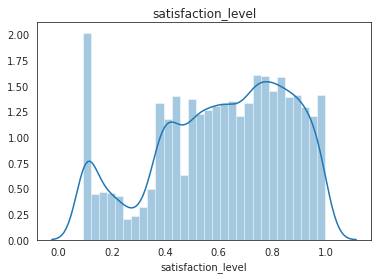

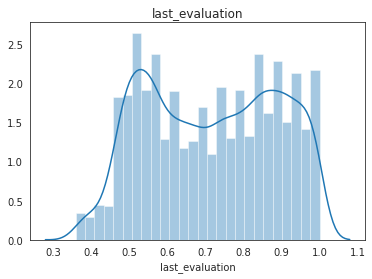

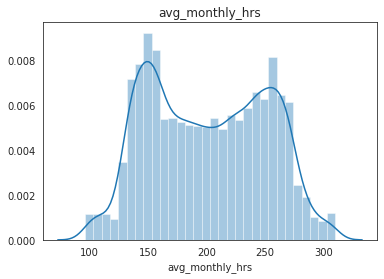

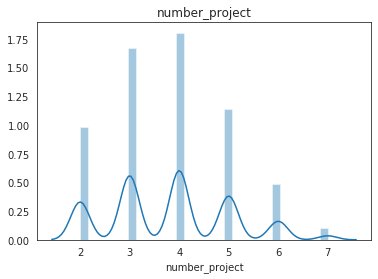

In [0]:
sns.set_style("white")
for col in numeric_cols:
  # Plotting histogram
  sns.distplot(churn_df[col], kde=True)
  # Title each plot
  plt.title(f'{col}')
  # Show each plot with title
  plt.show()

## 1.10 Look into target Variable

Obviously less people left than stayed. 

1 means churn is true therefore employee left

0 means churn is false therefore employee stayed

Therefore, there is a class imbalance. 

In [0]:
churn_df['churn'].value_counts()

0    11428
1     3571
Name: churn, dtype: int64

In [0]:
churn_df['churn'].value_counts(normalize = True)

0    0.761917
1    0.238083
Name: churn, dtype: float64

## 1.11 Satisfaction and Evaluation

In [0]:
churn_df[(churn_df['last_evaluation']>=0.80)&(churn_df['satisfaction_level']>=0.80)]

,id,satisfaction_level,last_evaluation,number_project,avg_monthly_hrs,yrs_w_company,Work_accident,churn,promotion_last_5years,department,salary
1,1,0.80,0.86,5,262,6,0,1,0,sales,2
7,7,0.92,0.85,5,259,5,0,1,0,sales,1
8,8,0.89,1.00,5,224,5,0,1,0,sales,1
12,12,0.84,0.92,4,234,5,0,1,0,sales,1
25,25,0.89,0.92,5,242,5,0,1,0,sales,1
...,...,...,...,...,...,...,...,...,...,...,...
14966,14966,0.83,0.81,5,219,5,0,1,0,sales,1
14977,14977,0.81,0.85,4,251,6,0,1,0,hr,2
14985,14985,0.91,0.99,5,254,5,0,1,0,technical,2
14986,14986,0.85,0.85,4,247,6,0,1,0,technical,1


# 2. Creating New Variables

In [0]:
churn_df.head()

,id,satisfaction_level,last_evaluation,number_project,avg_monthly_hrs,yrs_w_company,Work_accident,churn,promotion_last_5years,department,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,low
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,0.37,0.52,2,159,3,0,1,0,sales,low


## 2.1 Salary to Numeric

Changing salary to numeric retains its meaning because the values are hierarchical. Assigning integers will keep this in place.

In [0]:
# Low = 1
# Medium = 2
# High = 3
salary_map = {'low':1,'medium':2,'high':3}
churn_df['salary'] = churn_df['salary'].map(salary_map)

In [0]:
# It is clear that salary doesn't seem to have much correlation with anything in this way. At least on its own.
churn_df[numeric_cols+categor_cols+target].corr()

,satisfaction_level,last_evaluation,avg_monthly_hrs,number_project,yrs_w_company,Work_accident,promotion_last_5years,salary,churn
satisfaction_level,1.000000,0.105021,-0.020048,-0.142970,-0.100866,0.058697,0.025605,0.050022,-0.388375
last_evaluation,0.105021,1.000000,0.339742,0.349333,0.131591,-0.007104,-0.008684,-0.013002,0.006567
avg_monthly_hrs,-0.020048,0.339742,1.000000,0.417211,0.127755,-0.010143,-0.003544,-0.002242,0.071287
number_project,-0.142970,0.349333,0.417211,1.000000,0.196786,-0.004741,-0.006064,-0.001803,0.023787
yrs_w_company,-0.100866,0.131591,0.127755,0.196786,1.000000,0.002120,0.067433,0.048715,0.144822
Work_accident,0.058697,-0.007104,-0.010143,-0.004741,0.002120,1.000000,0.039245,0.009247,-0.154622
promotion_last_5years,0.025605,-0.008684,-0.003544,-0.006064,0.067433,0.039245,1.000000,0.098119,-0.061788
salary,0.050022,-0.013002,-0.002242,-0.001803,0.048715,0.009247,0.098119,1.000000,-0.157898
churn,-0.388375,0.006567,0.071287,0.023787,0.144822,-0.154622,-0.061788,-0.157898,1.000000


### QC

In [0]:
# Make sure the mapping worked as desired
churn_df.salary.unique()

array([1, 2, 3])

## 2.2 Create Order 2 columns

Since I can't think of extra variables on their own - I'm going to create a bunch of variables, where we multiply each of the variables by the others. We can do this in a loop

In [0]:
def map_features(dataframe):
  df = dataframe[numeric_cols+categor_cols]
  qc_list = []
  features = df
  for col_i in df.columns:
    for col_j in df.columns:
      new = pd.DataFrame(df[col_i].mul(df[col_j],axis=0))
      new.columns = [col_i+'*'+col_j]
      features = pd.concat([features,new],axis=1)
      if col_i == col_j:
        qc_list.append((col_i,new.sum()))      
  return [qc_list,features]

### QC

In [0]:
# Make sure the calculation in the function was done correctly, by checking some of them
qc_list = map_features(churn_df)[0]
qc_list

[('satisfaction_level', satisfaction_level*satisfaction_level    6560.2327
  dtype: float64),
 ('last_evaluation', last_evaluation*last_evaluation    8130.9371
  dtype: float64),
 ('avg_monthly_hrs', avg_monthly_hrs*avg_monthly_hrs    643687856
  dtype: int64),
 ('number_project', number_project*number_project    239720
  dtype: int64),
 ('yrs_w_company', yrs_w_company*yrs_w_company    215528
  dtype: int64),
 ('Work_accident', Work_accident*Work_accident    2169
  dtype: int64),
 ('promotion_last_5years', promotion_last_5years*promotion_last_5years    319
  dtype: int64),
 ('salary', salary*salary    44233
  dtype: int64)]

In [0]:
for i in churn_df[numeric_cols+categor_cols].columns:
  print((churn_df[i]*churn_df[i]).sum())

6560.2327
8130.9371
643687856
239720
215528
2169
319
44233


These numbers match

QCED

## 2.3 Including Log and $\sqrt`$ columns

In [0]:
def log_column(dataframe):
  '''
  This function applies the log function to all the numeric columns
  '''
  df = dataframe[numeric_cols]
  df.rename(columns = {'satisfaction_level':'log_satisfaction_level',
             'last_evaluation':'log_last_evaluation',
             'avg_monthly_hrs':'log_avg_monthly_hrs',
             'number_project':'log_number_project'}, inplace=True)
  return df.apply(np.log)

In [0]:
def sqrt_column(dataframe):
  '''
  This function applies the sqrt function to all the numeric columns
  '''
  df = dataframe[numeric_cols]
  df.rename(columns = {'satisfaction_level':'sqrt_satisfaction_level',
             'last_evaluation':'sqrt_last_evaluation',
             'avg_monthly_hrs':'sqrt_avg_monthly_hrs',
             'number_project':'sqrt_number_project'}, inplace=True)
  return df.apply(np.sqrt)

In [0]:
churn_df

,id,satisfaction_level,last_evaluation,number_project,avg_monthly_hrs,yrs_w_company,Work_accident,churn,promotion_last_5years,department,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,1
1,1,0.80,0.86,5,262,6,0,1,0,sales,2
2,2,0.11,0.88,7,272,4,0,1,0,sales,2
3,3,0.72,0.87,5,223,5,0,1,0,sales,1
4,4,0.37,0.52,2,159,3,0,1,0,sales,1
...,...,...,...,...,...,...,...,...,...,...,...
14994,14994,0.40,0.57,2,151,3,0,1,0,support,1
14995,14995,0.37,0.48,2,160,3,0,1,0,support,1
14996,14996,0.37,0.53,2,143,3,0,1,0,support,1
14997,14997,0.11,0.96,6,280,4,0,1,0,support,1


### QC

In [0]:
sqrt_column(churn_df)['sqrt_avg_monthly_hrs'].sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


210981.73853099404

In [0]:
np.sqrt(churn_df['avg_monthly_hrs']).sum()

210981.73853099404

In [0]:
log_column(churn_df)['log_avg_monthly_hrs'].sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


79060.36341811951

In [0]:
np.log(churn_df['avg_monthly_hrs']).sum()

79060.36341811951

## 2.4 Dropping Columns by Correlation

Now that we have a whole bunch of columns, let's start paring them down. We will drop the low correlation with `churn` columns, as well as the highly collinear columns

In [9]:
analysis_churn_df = pd.concat([log_column(churn_df), sqrt_column(churn_df), map_features(churn_df)[1], churn_df[target]], axis= 1)
analysis_df = pd.concat([log_column(churn_df), sqrt_column(churn_df), map_features(churn_df)[1]], axis= 1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [0]:
analysis_churn_df.corr()['churn'].abs().sort_values(ascending = False)

churn                        1.000000
log_satisfaction_level       0.420188
sqrt_satisfaction_level      0.407555
satisfaction_level           0.388375
satisfaction_level*salary    0.346027
                               ...   
yrs_w_company*salary         0.021944
salary*yrs_w_company         0.021944
log_last_evaluation          0.015295
last_evaluation              0.006567
sqrt_last_evaluation         0.004564
Name: churn, Length: 81, dtype: float64

In [0]:
def drop_collinear(df):
  # Create correlation matrix
  corr_matrix = df.corr().abs()

  # Select upper triangle of correlation matrix
  # triu gives upper triangle of the matrix
  # We simply gave it a matrix of True and False values in the shape of the correlation matrix, which then replaced all the
  # False values with NaNs and left all the values in the true spots as is. 
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
  to_drop_coll = [column for column in upper.columns if any(upper[column] > 0.9)]

  new_df = df.drop(columns = to_drop_coll)
  return new_df

In [0]:
def drop_low_corr(df):
  # Create correlation matrix with just the target column
  # Turn it into a data frame and transpose it.
  temp_df = df.corr()['churn'].abs().sort_values().to_frame().transpose()

  to_drop_low = [column for column in temp_df if any(temp_df[column]<0.1)]

  new_df = df.drop(columns = to_drop_low)
  return new_df

In [12]:
pd.set_option('max_rows',500,'max_columns',500)
drop_low_corr(drop_collinear(analysis_churn_df)).corr()['churn'].abs().sort_values(ascending= False)

churn                                 1.000000
log_satisfaction_level                0.420188
satisfaction_level*salary             0.346027
satisfaction_level*number_project     0.330001
satisfaction_level*avg_monthly_hrs    0.301456
satisfaction_level*last_evaluation    0.292508
avg_monthly_hrs*yrs_w_company         0.196768
last_evaluation*yrs_w_company         0.168130
number_project*yrs_w_company          0.164871
salary                                0.157898
avg_monthly_hrs*number_project        0.155323
Work_accident                         0.154622
yrs_w_company                         0.144822
last_evaluation*salary                0.131273
yrs_w_company*Work_accident           0.130211
satisfaction_level*yrs_w_company      0.121405
last_evaluation*avg_monthly_hrs       0.117582
last_evaluation*number_project        0.114602
number_project*salary                 0.107324
Name: churn, dtype: float64

In [0]:
final_df = drop_low_corr(drop_collinear(analysis_churn_df)).drop(columns = 'churn')
target_df = analysis_churn_df[target]

# 3. Analysis

I have added the following columns:

* $\sqrt(\text{numeric columns})$
* $\log(\text{numeric columns})$
* $(\text{numeric columns})^2$
* $(\text{category columns})^2$
* numeric columns$\times$category columns

Best Recall Scores

* Logistic Regression: $86.2\pm2.8$
* KNN: $97.5\pm3.2$
* Decision Trees: $95.8\pm0.1$

In [0]:
analysis_df.head()

,log_satisfaction_level,log_last_evaluation,log_avg_monthly_hrs,log_number_project,sqrt_satisfaction_level,sqrt_last_evaluation,sqrt_avg_monthly_hrs,sqrt_number_project,satisfaction_level,last_evaluation,avg_monthly_hrs,number_project,yrs_w_company,Work_accident,promotion_last_5years,salary,satisfaction_level*satisfaction_level,satisfaction_level*last_evaluation,satisfaction_level*avg_monthly_hrs,satisfaction_level*number_project,satisfaction_level*yrs_w_company,satisfaction_level*Work_accident,satisfaction_level*promotion_last_5years,satisfaction_level*salary,last_evaluation*satisfaction_level,last_evaluation*last_evaluation,last_evaluation*avg_monthly_hrs,last_evaluation*number_project,last_evaluation*yrs_w_company,last_evaluation*Work_accident,last_evaluation*promotion_last_5years,last_evaluation*salary,avg_monthly_hrs*satisfaction_level,avg_monthly_hrs*last_evaluation,avg_monthly_hrs*avg_monthly_hrs,avg_monthly_hrs*number_project,avg_monthly_hrs*yrs_w_company,avg_monthly_hrs*Work_accident,avg_monthly_hrs*promotion_last_5years,avg_monthly_hrs*salary,number_project*satisfaction_level,number_project*last_evaluation,number_project*avg_monthly_hrs,number_project*number_project,number_project*yrs_w_company,number_project*Work_accident,number_project*promotion_last_5years,number_project*salary,yrs_w_company*satisfaction_level,yrs_w_company*last_evaluation,yrs_w_company*avg_monthly_hrs,yrs_w_company*number_project,yrs_w_company*yrs_w_company,yrs_w_company*Work_accident,yrs_w_company*promotion_last_5years,yrs_w_company*salary,Work_accident*satisfaction_level,Work_accident*last_evaluation,Work_accident*avg_monthly_hrs,Work_accident*number_project,Work_accident*yrs_w_company,Work_accident*Work_accident,Work_accident*promotion_last_5years,Work_accident*salary,promotion_last_5years*satisfaction_level,promotion_last_5years*last_evaluation,promotion_last_5years*avg_monthly_hrs,promotion_last_5years*number_project,promotion_last_5years*yrs_w_company,promotion_last_5years*Work_accident,promotion_last_5years*promotion_last_5years,promotion_last_5years*salary,salary*satisfaction_level,salary*last_evaluation,salary*avg_monthly_hrs,salary*number_project,salary*yrs_w_company,salary*Work_accident,salary*promotion_last_5years,salary*salary
0,-0.967584,-0.634878,5.056246,0.693147,0.616441,0.728011,12.529964,1.414214,0.38,0.53,157,2,3,0,0,1,0.1444,0.2014,59.66,0.76,1.14,0.0,0.0,0.38,0.2014,0.2809,83.21,1.06,1.59,0.0,0.0,0.53,59.66,83.21,24649,314,471,0,0,157,0.76,1.06,314,4,6,0,0,2,1.14,1.59,471,6,9,0,0,3,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0.38,0.53,157,2,3,0,0,1
1,-0.223144,-0.150823,5.568345,1.609438,0.894427,0.927362,16.186414,2.236068,0.80,0.86,262,5,6,0,0,2,0.6400,0.6880,209.60,4.00,4.80,0.0,0.0,1.60,0.6880,0.7396,225.32,4.30,5.16,0.0,0.0,1.72,209.60,225.32,68644,1310,1572,0,0,524,4.00,4.30,1310,25,30,0,0,10,4.80,5.16,1572,30,36,0,0,12,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,1.60,1.72,524,10,12,0,0,4
2,-2.207275,-0.127833,5.605802,1.945910,0.331662,0.938083,16.492423,2.645751,0.11,0.88,272,7,4,0,0,2,0.0121,0.0968,29.92,0.77,0.44,0.0,0.0,0.22,0.0968,0.7744,239.36,6.16,3.52,0.0,0.0,1.76,29.92,239.36,73984,1904,1088,0,0,544,0.77,6.16,1904,49,28,0,0,14,0.44,3.52,1088,28,16,0,0,8,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0.22,1.76,544,14,8,0,0,4
3,-0.328504,-0.139262,5.407172,1.609438,0.848528,0.932738,14.933185,2.236068,0.72,0.87,223,5,5,0,0,1,0.5184,0.6264,160.56,3.60,3.60,0.0,0.0,0.72,0.6264,0.7569,194.01,4.35,4.35,0.0,0.0,0.87,160.56,194.01,49729,1115,1115,0,0,223,3.60,4.35,1115,25,25,0,0,5,3.60,4.35,1115,25,25,0,0,5,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0.72,0.87,223,5,5,0,0,1
4,-0.994252,-0.653926,5.068904,0.693147,0.608276,0.721110,12.609520,1.414214,0.37,0.52,159,2,3,0,0,1,0.1369,0.1924,58.83,0.74,1.11,0.0,0.0,0.37,0.1924,0.2704,82.68,1.04,1.56,0.0,0.0,0.52,58.83,82.68,25281,318,477,0,0,159,0.74,1.04,318,4,6,0,0,2,1.11,1.56,477,6,9,0,0,3,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0.37,0.52,159,2,3,0,0,1


In [0]:
# Define our sigmoid function first
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [0]:
# define our variables
x = final_df
y = target_df.values.flatten()

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state =3)

## 3.1 Logistic Regression

### 3.1.1 Trial

In [0]:
clf = LogisticRegression(class_weight = 'balanced', C = 2, solver = 'newton-cg')

In [0]:
clf.fit(x_train,y_train)

In [0]:
clf.score(x_train,y_train)

In [0]:
clf.score(x_test,y_test)

In [0]:
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [0]:
confusion_matrix(y_train,y_train_pred)

In [0]:
confusion_matrix(y_test,y_test_pred)

In [0]:
print(f'''
      Train Data
      Accuracy: {accuracy_score(y_train, y_train_pred)}
      Precision: {precision_score(y_train, y_train_pred)}
      Recall: {recall_score(y_train, y_train_pred)}
      F1: {f1_score(y_train, y_train_pred)}\n
      Test Data
      Accuracy: {accuracy_score(y_test, y_test_pred)}
      Precision: {precision_score(y_test, y_test_pred)}
      Recall: {recall_score(y_test, y_test_pred)}
      F1: {f1_score(y_test, y_test_pred)}
      ''')

### 3.1.2 A Grid Search

Now that we know this model works pretty well, let's do a grid search for the best model

I will grid search through the parameters for Recall optimization. 

The reason for this is because we want to minimize the number of people that are going to churn and that we miss. We do not want to miss people in this prediction. 

In [0]:
# We can get the parameters that we can change by running LogisticRegression().get_params()
params_logistic = {
    'clf1__penalty' : ['l2','l1'],
    'clf1__solver' : ['newton-cg','sag','saga','liblinear'],
    'clf1__C': np.logspace(-4,3,22),
    'clf1__random_state': [3]
}

In [0]:
pipe_logistic = Pipeline([('scaler',StandardScaler()), ('clf1', LogisticRegression(class_weight = 'balanced'))])

In [0]:
def grid_search_logistic(scoring: str):
  search = GridSearchCV(pipe_logistic,
                        params_logistic,
                        scoring = scoring,
                        cv = 4,
                        n_jobs = -1,
                        verbose = 1)
  return search

In [0]:
grid_search_logistic_info = grid_search_logistic('recall').fit(x,y)

Fitting 4 folds for each of 176 candidates, totalling 704 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 538 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done 701 out of 704 | elapsed:  1.2min remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 704 out of 704 | elapsed:  1.2min finished


In [0]:
log_reg_recall_gsl = pd.DataFrame(grid_search_logistic_info.cv_results_)

In [0]:
# The best method
log_reg_recall_gsl[log_reg_recall_gsl['mean_test_score']==log_reg_recall_gsl['mean_test_score'].max()].iloc[0]

mean_fit_time                                                       0.0690219
std_fit_time                                                        0.0149265
mean_score_time                                                    0.00593412
std_score_time                                                    0.000656687
param_clf1__C                                                            0.01
param_clf1__penalty                                                        l2
param_clf1__random_state                                                    3
param_clf1__solver                                                  liblinear
params                      {'clf1__C': 0.01, 'clf1__penalty': 'l2', 'clf1...
split0_test_score                                                    0.862262
split1_test_score                                                    0.819709
split2_test_score                                                    0.866741
split3_test_score                                               

### 3.1.3 Best Model

In [0]:
scaler = StandardScaler()
scaler.fit(x_train,y_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [0]:
log_reg = LogisticRegression(C=0.5, solver='liblinear', random_state=3, penalty='l2',class_weight = 'balanced')

In [0]:
log_reg.fit(x_train_scaled,y_train)
log_reg.score(x_train_scaled, y_train)

log_reg.score(x_test_scaled,y_test)

0.8328

In [0]:
x.columns

Index(['log_satisfaction_level', 'yrs_w_company', 'Work_accident', 'salary',
       'satisfaction_level*last_evaluation',
       'satisfaction_level*avg_monthly_hrs',
       'satisfaction_level*number_project', 'satisfaction_level*yrs_w_company',
       'satisfaction_level*salary', 'last_evaluation*avg_monthly_hrs',
       'last_evaluation*number_project', 'last_evaluation*yrs_w_company',
       'last_evaluation*salary', 'avg_monthly_hrs*number_project',
       'avg_monthly_hrs*yrs_w_company', 'number_project*yrs_w_company',
       'number_project*salary', 'yrs_w_company*Work_accident'],
      dtype='object')

In [0]:
model = ''
for i in range(len(x.columns)):
  model+=str(log_reg.coef_[0][i])
  model+=' * '
  model+=x.columns[i]
  model+='\n'

In [0]:
print(model+str(log_reg.intercept_[0]))

-2.4931000476071214 * log_satisfaction_level
-5.849473695622581 * yrs_w_company
0.09047592828682466 * Work_accident
1.365856420814636 * salary
-0.17528049987695746 * satisfaction_level*last_evaluation
-0.8603276951496909 * satisfaction_level*avg_monthly_hrs
-0.1568464037506145 * satisfaction_level*number_project
3.465749660948945 * satisfaction_level*yrs_w_company
-0.3966182789002219 * satisfaction_level*salary
-0.5574685473710291 * last_evaluation*avg_monthly_hrs
-0.4761118312166291 * last_evaluation*number_project
2.198460883939454 * last_evaluation*yrs_w_company
-0.6309471807287911 * last_evaluation*salary
-0.10490351656057133 * avg_monthly_hrs*number_project
1.748458141284059 * avg_monthly_hrs*yrs_w_company
1.2398044439947973 * number_project*yrs_w_company
-1.4911646349750736 * number_project*salary
-0.6591023230983541 * yrs_w_company*Work_accident
-0.6924141425520108


## 3.2 KNN

Let's try the same thing with K Nearest Neighbours. 

### 3.2.1 Grid Search

In [0]:
mm_scaler = MinMaxScaler()
std_scaler = StandardScaler()

In [0]:
pipe_knn = Pipeline([('scaler',MinMaxScaler()), ('clf2', KNeighborsClassifier())])

In [0]:
# We can get the parameters that we can change by running KNeighborsClassifier().get_params()
params_knn = {
    'clf2__p' : [2,1],
    'clf2__metric' : ['minkowski','euclidean','manhattan'],
    'clf2__n_neighbors': np.arange(5,21,2),
    'clf2__weights':['uniform','distance'],
    'clf2__algorithm':['kd_tree','ball_tree'],
    'clf2__leaf_size':[20,30,40,50]
}

In [0]:
def grid_search_knn(scoring: str):
  search = RandomizedSearchCV(pipe_knn,
                        params_knn,
                        scoring = scoring,
                        cv = 4,
                        n_jobs = -1,
                        verbose = 1,
                        n_iter = 100)
  return search

In [0]:
grid_search_knn_info = grid_search_knn('recall').fit(x,y)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  3.6min finished


In [0]:
knn_recall_gs = pd.DataFrame(grid_search_knn_info.cv_results_)

In [0]:
# The best method
knn_recall_gs[knn_recall_gs['mean_test_score']==knn_recall_gs['mean_test_score'].max()].iloc[0]

mean_fit_time                                                      0.0718752
std_fit_time                                                       0.0107361
mean_score_time                                                      1.43288
std_score_time                                                     0.0703123
param_clf2__weights                                                 distance
param_clf2__p                                                              1
param_clf2__n_neighbors                                                    7
param_clf2__metric                                                 minkowski
param_clf2__leaf_size                                                     50
param_clf2__algorithm                                              ball_tree
params                     {'clf2__weights': 'distance', 'clf2__p': 1, 'c...
split0_test_score                                                   0.988802
split1_test_score                                                   0.917133

### 3.2.2 Best Model


In [0]:
mm_scaler.fit(x_train,y_train)
x_train_scaled = mm_scaler.transform(x_train)
x_test_scaled = mm_scaler.transform(x_test)

In [0]:
knn_fit = KNeighborsClassifier(p=1, n_neighbors=7, metric='minkowski',leaf_size=50, algorithm='ball_tree',weights='distance')

In [0]:
knn_fit.fit(x_train_scaled,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=50, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=1,
                     weights='distance')

In [0]:
import pickle
knn_model = 'finalized_model_KNN.sav'
pickle.dump(knn_fit, open(knn_model, 'wb'))

In [0]:
scaler_model = 'data_scaler_mm.sav'
pickle.dump(mm_scaler, open(scaler_model, 'wb'))

In [0]:
y_test_pred = knn_fit.predict(x_test_scaled)

In [0]:
recall_score(y_test, y_test_pred)

0.9627959413754228

In [0]:
mean_squared_error(y_test, y_test_pred)

0.024266666666666666

In [0]:
y_test_pred

array([0, 0, 1, ..., 0, 1, 0])

## 3.3 Decision Trees

Some useful websites for visualization:

https://github.com/parrt/dtreeviz

https://github.com/parrt/dtreeviz/blob/master/notebooks/colors.ipynb

In [0]:
pip install dtreeviz

In [0]:
from dtreeviz.trees import *
from sklearn import tree
from IPython.core.display import display, HTML

### 3.3.1 Trial

In [0]:
clf_dt = DecisionTreeClassifier(max_depth=6)
clf_dt.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [0]:
viz = dtreeviz(clf_dt, x, y,
              target_name='churn',
              feature_names=x.columns, 
              class_names=['leaving', 'not-leaving'],
              fancy=False )  

display(HTML(viz.svg()))

### 3.3.2 Grid Search

In [20]:
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [0]:
clf3 = DecisionTreeClassifier()
#
params_dt = {
    'class_weight': ['balanced'],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3,4,5],
    'max_features': [len(x.columns)-6, len(x.columns)-5,len(x.columns)-4, None],
    'max_leaf_nodes':[2,3,4],
    'min_samples_leaf':[2,3],
    'min_samples_split':[2,3],
    'random_state':[3],
    'splitter':['best','random']
}

In [0]:
#n_iter = 100)
def grid_search_dt(scoring: str):
  search = GridSearchCV(DecisionTreeClassifier(),
                        params_dt,
                        scoring = scoring,
                        cv = 4,
                        n_jobs = -1,
                        verbose = 1)
                        
  return search

In [61]:
grid_search_dt_info = grid_search_dt('recall').fit(x,y)

Fitting 4 folds for each of 576 candidates, totalling 2304 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 2304 out of 2304 | elapsed:   41.7s finished


In [0]:
dt_recall_gs = pd.DataFrame(grid_search_dt_info.cv_results_)

In [63]:
dt_recall_gs.sort_values(by='rank_test_score').head(20)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_criterion,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,param_random_state,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
407,0.015326,0.001067,0.004804,0.000184,balanced,entropy,4,12,4,3,3,3,random,"{'class_weight': 'balanced', 'criterion': 'ent...",0.980963,0.985442,0.983203,0.946188,0.973949,0.016106,1
405,0.015329,0.000380,0.004838,0.000087,balanced,entropy,4,12,4,3,2,3,random,"{'class_weight': 'balanced', 'criterion': 'ent...",0.980963,0.985442,0.983203,0.946188,0.973949,0.016106,1
403,0.015936,0.000944,0.005048,0.000346,balanced,entropy,4,12,4,2,3,3,random,"{'class_weight': 'balanced', 'criterion': 'ent...",0.980963,0.985442,0.983203,0.946188,0.973949,0.016106,1
401,0.015022,0.000949,0.004846,0.000204,balanced,entropy,4,12,4,2,2,3,random,"{'class_weight': 'balanced', 'criterion': 'ent...",0.980963,0.985442,0.983203,0.946188,0.973949,0.016106,1
311,0.017256,0.003932,0.004861,0.000108,balanced,entropy,3,12,4,3,3,3,random,"{'class_weight': 'balanced', 'criterion': 'ent...",0.980963,0.985442,0.983203,0.946188,0.973949,0.016106,1
309,0.015050,0.000691,0.006332,0.002531,balanced,entropy,3,12,4,3,2,3,random,"{'class_weight': 'balanced', 'criterion': 'ent...",0.980963,0.985442,0.983203,0.946188,0.973949,0.016106,1
499,0.014460,0.000461,0.004890,0.000498,balanced,entropy,5,12,4,2,3,3,random,"{'class_weight': 'balanced', 'criterion': 'ent...",0.980963,0.985442,0.983203,0.946188,0.973949,0.016106,1
307,0.016926,0.003914,0.004985,0.000185,balanced,entropy,3,12,4,2,3,3,random,"{'class_weight': 'balanced', 'criterion': 'ent...",0.980963,0.985442,0.983203,0.946188,0.973949,0.016106,1
501,0.014460,0.000426,0.004768,0.000118,balanced,entropy,5,12,4,3,2,3,random,"{'class_weight': 'balanced', 'criterion': 'ent...",0.980963,0.985442,0.983203,0.946188,0.973949,0.016106,1
503,0.015016,0.000967,0.005038,0.000508,balanced,entropy,5,12,4,3,3,3,random,"{'class_weight': 'balanced', 'criterion': 'ent...",0.980963,0.985442,0.983203,0.946188,0.973949,0.016106,1


In [64]:
# The best method
dt_recall_gs[dt_recall_gs['mean_test_score']==dt_recall_gs['mean_test_score'].max()].iloc[0]

mean_fit_time                                                      0.0166093
std_fit_time                                                      0.00282894
mean_score_time                                                   0.00503117
std_score_time                                                   0.000270109
param_class_weight                                                  balanced
param_criterion                                                      entropy
param_max_depth                                                            3
param_max_features                                                        12
param_max_leaf_nodes                                                       4
param_min_samples_leaf                                                     2
param_min_samples_split                                                    2
param_random_state                                                         3
param_splitter                                                        random

### 3.3.3 Best Model

In [0]:
pip install colors.py

In [0]:
import colors

In [56]:
clf_dt = DecisionTreeClassifier(class_weight = 'balanced',
                                max_depth=3, 
                                criterion='entropy', 
                                max_features=12, 
                                max_leaf_nodes=4, 
                                min_samples_leaf=2, 
                                min_samples_split=2,
                                random_state = 3,
                                splitter = 'best')
clf_dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=3, max_features=12,
                       max_leaf_nodes=4, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=3, splitter='best')

In [0]:
color_blind_colors = [None, # 0 classes
                      None, # 1 class
                      ["#F38523","#2932D3"], # 2 classes
                      ["#ff0000","#00ff00",'#0000ff'], # colors were changed here
                      ["#FEFEBB","#D9E6F5",'#a1dab4','#fee090'], # 4
                      ["#FEFEBB","#D9E6F5",'#a1dab4','#41b6c4','#fee090'], # 5
                      ["#FEFEBB",'#c7e9b4','#41b6c4','#2c7fb8','#fee090','#f46d43'], # 6
                      ["#FEFEBB",'#c7e9b4','#7fcdbb','#41b6c4','#225ea8','#fdae61','#f46d43'], # 7
                      ["#FEFEBB",'#edf8b1','#c7e9b4','#7fcdbb','#1d91c0','#225ea8','#fdae61','#f46d43'], # 8
                      ["#FEFEBB",'#c7e9b4','#41b6c4','#74add1','#4575b4','#313695','#fee090','#fdae61','#f46d43'], # 9
                      ["#FEFEBB",'#c7e9b4','#41b6c4','#74add1','#4575b4','#313695','#fee090','#fdae61','#f46d43','#d73027']] # 10

In [58]:
viz = dtreeviz(clf_dt, x_train, y_train,
              target_name='Churn',
              feature_names=x.columns, 
              class_names=['True', 'False'],
              fancy=False,
              colors = {'classes':color_blind_colors})  

display(HTML(viz.svg()))

In [41]:
(x_train.columns.values)

array(['log_satisfaction_level', 'yrs_w_company', 'Work_accident',
       'salary', 'satisfaction_level*last_evaluation',
       'satisfaction_level*avg_monthly_hrs',
       'satisfaction_level*number_project',
       'satisfaction_level*yrs_w_company', 'satisfaction_level*salary',
       'last_evaluation*avg_monthly_hrs',
       'last_evaluation*number_project', 'last_evaluation*yrs_w_company',
       'last_evaluation*salary', 'avg_monthly_hrs*number_project',
       'avg_monthly_hrs*yrs_w_company', 'number_project*yrs_w_company',
       'number_project*salary', 'yrs_w_company*Work_accident'],
      dtype=object)

In [42]:
clf_dt.feature_importances_

array([0.4543679 , 0.40169159, 0.        , 0.        , 0.        ,
       0.        , 0.1439405 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

### 3.3.4 High Performers

I'll define the high performers as those who have a high value of `last_evaluation`*`yrs_w_company`. We will try another decision tree on these individuals.

In [0]:
x_high = x[x['last_evaluation*yrs_w_company']>=4.04]
y_high = y[x_high.index]

In [0]:
high_perform = grid_search_dt('recall').fit(x_high,y_high)

Fitting 4 folds for each of 432 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed:    9.4s finished


In [0]:
high_cv_results = pd.DataFrame(high_perform.cv_results_)

In [0]:
high_cv_results[high_cv_results['mean_test_score']==high_cv_results['mean_test_score'].max()].iloc[0]

mean_fit_time                                                     0.00768787
std_fit_time                                                     0.000652256
mean_score_time                                                   0.00297046
std_score_time                                                   0.000162051
param_criterion                                                      entropy
param_max_depth                                                            3
param_max_features                                                        13
param_max_leaf_nodes                                                       2
param_min_samples_leaf                                                     2
param_min_samples_split                                                    2
param_random_state                                                         3
param_splitter                                                          best
params                     {'criterion': 'entropy', 'max_depth': 3, 'max_...

In [0]:
x_high_train, x_high_test, y_high_train, y_high_test = train_test_split(x_high,y_high, test_size = 0.25, random_state=3)

In [0]:
clf_dt_high = DecisionTreeClassifier(max_depth=5, 
                                criterion='entropy', 
                                max_features=13, 
                                max_leaf_nodes=2, 
                                min_samples_leaf=2, 
                                min_samples_split=3,
                                random_state = 3,
                                splitter = 'best')
clf_dt_high.fit(x_high_train,y_high_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=13, max_leaf_nodes=2,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3, splitter='best')

In [0]:
viz = dtreeviz(clf_dt_high, x_high_test, y_high_test,
              target_name='Churn',
              feature_names=x.columns, 
              class_names=['True', 'False'],
              fancy=False,
              colors = {'classes':color_blind_colors})  

display(HTML(viz.svg()))

In [0]:
x.sort_values(by ='satisfaction_level*yrs_w_company', ascending=False).head(50)

,log_satisfaction_level,yrs_w_company,Work_accident,salary,satisfaction_level*last_evaluation,satisfaction_level*avg_monthly_hrs,satisfaction_level*number_project,satisfaction_level*yrs_w_company,satisfaction_level*salary,last_evaluation*avg_monthly_hrs,last_evaluation*number_project,last_evaluation*yrs_w_company,last_evaluation*salary,avg_monthly_hrs*number_project,avg_monthly_hrs*yrs_w_company,number_project*yrs_w_company,number_project*salary,yrs_w_company*Work_accident
11230,-0.010050,10,0,3,0.8316,140.58,3.96,9.9,2.97,119.28,3.36,8.4,2.52,568,1420,40,12,0
11944,-0.010050,10,1,2,0.6732,261.36,4.95,9.9,1.98,179.52,3.40,6.8,1.36,1320,2640,50,10,10
14155,-0.010050,10,1,2,0.6732,261.36,4.95,9.9,1.98,179.52,3.40,6.8,1.36,1320,2640,50,10,10
13441,-0.010050,10,0,3,0.8316,140.58,3.96,9.9,2.97,119.28,3.36,8.4,2.52,568,1420,40,12,0
13877,-0.020203,10,1,1,0.9702,255.78,3.92,9.8,0.98,258.39,3.96,9.9,0.99,1044,2610,40,4,10
13473,-0.020203,10,0,2,0.6566,186.20,2.94,9.8,1.96,127.30,2.01,6.7,1.34,570,1900,30,6,0
13557,-0.020203,10,0,3,0.6860,149.94,2.94,9.8,2.94,107.10,2.10,7.0,2.10,459,1530,30,9,0
13724,-0.020203,10,0,2,0.4802,195.02,2.94,9.8,1.96,97.51,1.47,4.9,0.98,597,1990,30,6,0
13474,-0.020203,10,0,2,0.9604,166.60,3.92,9.8,1.96,166.60,3.92,9.8,1.96,680,1700,40,8,0
11513,-0.020203,10,0,2,0.4802,195.02,2.94,9.8,1.96,97.51,1.47,4.9,0.98,597,1990,30,6,0


# Meeting with Mike

In [68]:
# Making bins?
print(pd.qcut(analysis_churn_df['last_evaluation'], q=3).unique())

[(0.359, 0.61], (0.82, 1.0], (0.61, 0.82]]
Categories (3, interval[float64]): [(0.359, 0.61] < (0.61, 0.82] < (0.82, 1.0]]


In [0]:
analysis_churn_df['Last_Eval_Bin'] = np.where(analysis_churn_df['last_evaluation'] > np.mean(analysis_churn_df['last_evaluation']), 1, 0)

In [0]:
analysis_churn_df['Yrs_Company_Bin'] = np.where(analysis_churn_df['yrs_w_company'] > np.mean(analysis_churn_df['yrs_w_company']), 1, 0)

In [74]:
analysis_churn_df.head()

,log_satisfaction_level,log_last_evaluation,log_avg_monthly_hrs,log_number_project,sqrt_satisfaction_level,sqrt_last_evaluation,sqrt_avg_monthly_hrs,sqrt_number_project,satisfaction_level,last_evaluation,avg_monthly_hrs,number_project,yrs_w_company,Work_accident,promotion_last_5years,salary,satisfaction_level*satisfaction_level,satisfaction_level*last_evaluation,satisfaction_level*avg_monthly_hrs,satisfaction_level*number_project,satisfaction_level*yrs_w_company,satisfaction_level*Work_accident,satisfaction_level*promotion_last_5years,satisfaction_level*salary,last_evaluation*satisfaction_level,last_evaluation*last_evaluation,last_evaluation*avg_monthly_hrs,last_evaluation*number_project,last_evaluation*yrs_w_company,last_evaluation*Work_accident,last_evaluation*promotion_last_5years,last_evaluation*salary,avg_monthly_hrs*satisfaction_level,avg_monthly_hrs*last_evaluation,avg_monthly_hrs*avg_monthly_hrs,avg_monthly_hrs*number_project,avg_monthly_hrs*yrs_w_company,avg_monthly_hrs*Work_accident,avg_monthly_hrs*promotion_last_5years,avg_monthly_hrs*salary,number_project*satisfaction_level,number_project*last_evaluation,number_project*avg_monthly_hrs,number_project*number_project,number_project*yrs_w_company,number_project*Work_accident,number_project*promotion_last_5years,number_project*salary,yrs_w_company*satisfaction_level,yrs_w_company*last_evaluation,yrs_w_company*avg_monthly_hrs,yrs_w_company*number_project,yrs_w_company*yrs_w_company,yrs_w_company*Work_accident,yrs_w_company*promotion_last_5years,yrs_w_company*salary,Work_accident*satisfaction_level,Work_accident*last_evaluation,Work_accident*avg_monthly_hrs,Work_accident*number_project,Work_accident*yrs_w_company,Work_accident*Work_accident,Work_accident*promotion_last_5years,Work_accident*salary,promotion_last_5years*satisfaction_level,promotion_last_5years*last_evaluation,promotion_last_5years*avg_monthly_hrs,promotion_last_5years*number_project,promotion_last_5years*yrs_w_company,promotion_last_5years*Work_accident,promotion_last_5years*promotion_last_5years,promotion_last_5years*salary,salary*satisfaction_level,salary*last_evaluation,salary*avg_monthly_hrs,salary*number_project,salary*yrs_w_company,salary*Work_accident,salary*promotion_last_5years,salary*salary,churn,Last_Eval_Bin,Yrs_Company_Bin
0,-0.967584,-0.634878,5.056246,0.693147,0.616441,0.728011,12.529964,1.414214,0.38,0.53,157,2,3,0,0,1,0.1444,0.2014,59.66,0.76,1.14,0.0,0.0,0.38,0.2014,0.2809,83.21,1.06,1.59,0.0,0.0,0.53,59.66,83.21,24649,314,471,0,0,157,0.76,1.06,314,4,6,0,0,2,1.14,1.59,471,6,9,0,0,3,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0.38,0.53,157,2,3,0,0,1,1,0,0
1,-0.223144,-0.150823,5.568345,1.609438,0.894427,0.927362,16.186414,2.236068,0.80,0.86,262,5,6,0,0,2,0.6400,0.6880,209.60,4.00,4.80,0.0,0.0,1.60,0.6880,0.7396,225.32,4.30,5.16,0.0,0.0,1.72,209.60,225.32,68644,1310,1572,0,0,524,4.00,4.30,1310,25,30,0,0,10,4.80,5.16,1572,30,36,0,0,12,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,1.60,1.72,524,10,12,0,0,4,1,1,1
2,-2.207275,-0.127833,5.605802,1.945910,0.331662,0.938083,16.492423,2.645751,0.11,0.88,272,7,4,0,0,2,0.0121,0.0968,29.92,0.77,0.44,0.0,0.0,0.22,0.0968,0.7744,239.36,6.16,3.52,0.0,0.0,1.76,29.92,239.36,73984,1904,1088,0,0,544,0.77,6.16,1904,49,28,0,0,14,0.44,3.52,1088,28,16,0,0,8,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0.22,1.76,544,14,8,0,0,4,1,1,1
3,-0.328504,-0.139262,5.407172,1.609438,0.848528,0.932738,14.933185,2.236068,0.72,0.87,223,5,5,0,0,1,0.5184,0.6264,160.56,3.60,3.60,0.0,0.0,0.72,0.6264,0.7569,194.01,4.35,4.35,0.0,0.0,0.87,160.56,194.01,49729,1115,1115,0,0,223,3.60,4.35,1115,25,25,0,0,5,3.60,4.35,1115,25,25,0,0,5,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0.72,0.87,223,5,5,0,0,1,1,1,1
4,-0.994252,-0.653926,5.068904,0.693147,0.608276,0.721110,12.609520,1.414214,0.37,0.52,159,2,3,0,0,1,0.1369,0.1924,58.83,0.74,1.11,0.0,0.0,0.37,0.1924,0.2704,82.68,1.04,1.56,0.0,0.0,0.52,58.83,82.68,25281,318,477,0,0,159,0.74,1.04,318,4,6,0,0,2,1.11,1.56,477,6,9,0,0,3,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0

In [75]:
analysis_churn_df.groupby(['Last_Eval_Bin', 'Yrs_Company_Bin'])['churn'].sum()

Last_Eval_Bin  Yrs_Company_Bin
0              0                  1573
               1                   105
1              0                    66
               1                  1827
Name: churn, dtype: int64